# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [41]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_fwd_eq = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92


"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Add some calculations to the following code block:

In [55]:
# Loop over these delta phi = phi_anode - phi_elyte values:
delta_phi = np.linspace(-0.9,0.05,100)
i_elementary = np.zeros_like(delta_phi)

T = 800+273.15        # Temperature, K
n = -2                 # Number of elctrnos transferred
beta = 0.5 

# Calculation of species concntrations

C_H_Ni = X_H_Ni*C_Ni_s
C_H2O_Ni = X_H2O_Ni*C_Ni_s
C_Vac_Ni = X_Vac_Ni*C_Ni_s
C_Vac_elyte = X_Vac_elyte*C_elyte
C_Ox_elyte = X_Ox_elyte*C_elyte

# Calculation fo deltaG of rxn:
pi_rev =  C_Vac_elyte*C_H2O_Ni*C_Vac_Ni
pi_fwd =  C_Ox_elyte*C_H_Ni**2
delg_0= g_Vac_elyte_o + g_Vac_Ni_o + g_H2O_Ni_o - g_Ox_elyte_o - 2*g_H_Ni_o
delg = delg_0 + R*T*log(pi_rev/pi_fwd)

# Calculation of reverse rate constant:
exp_fcn = exp(-delg/(R*T))
k_rev_eq = k_fwd_eq*pi_fwd/(exp_fcn*pi_rev) 

for ind, E in enumerate(delta_phi):
    k_fwd = k_fwd_eq*exp(-beta*n*F*E/(R*T))
    k_rev = k_rev_eq*exp((1-beta)*n*F*E/(R*T))
    i_elementary[ind] = n*F*(k_fwd*pi_fwd - k_rev*pi_rev)

Plot the results:

Text(0, 0.5, 'Current [A/m2]')

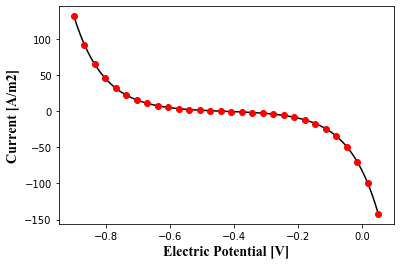

In [56]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

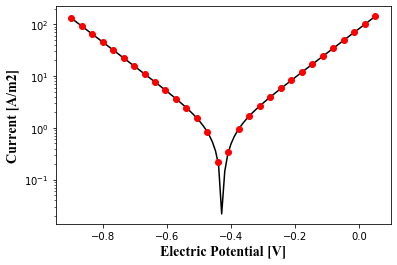

In [89]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:

The current calculatecd from masss action kinetics fit very well with the validation data.The plot shows that as we sweep toward more negative potentials, the current moves toward positive currents inidcating that the forward reaction is more dominant realtive to the reverse reaction. The second figure shows the symmetry of the forward and reverese charge transfer reactions based on the set value of $\beta = 0.5$ that results the following equivalency for anodic and cathodic current: $\alpha_{\rm a} = \alpha_{\rm c} = 1$

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [74]:

i_BV = np.zeros_like(delta_phi)

# Calculation of i_0
i_0 = n*F*k_fwd**(1-beta)*k_rev**(beta)*pi_fwd**(1-beta)*pi_rev**beta

# Calculation of deltaPhi at equilibrium
del_phi_eq = delg /(n*F)

for ind, E in enumerate(delta_phi):
    eta = E + del_phi_eq
    i_BV[ind] = i_0 *(exp(-beta*n*F*eta/(R*T))- exp((1-beta)*n*F*eta/(R*T)))

#### Let's plot the BV and Marcus currents together:

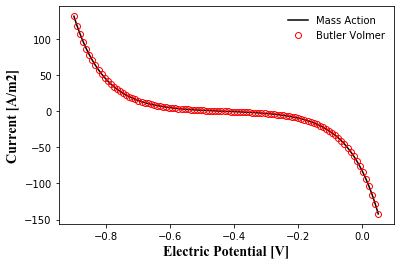

In [90]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

#### Discussion:

The plots show overlapping current values from both mass action kinetcis and Bulter-Volmer methods as B_V is theoretically derived from the mass action set of equations. Regarding the assumption of constant value of exchange current density, it is based on the underlying assumptions that temperature gradiant as well as reaction rate constants are to be constant over fuel cell operation time. Any deviations will subsequently result in a varying exchange current density.  

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [95]:
i_Tafel = np.zeros_like(delta_phi)
eta = np.zeros_like(delta_phi)

alpha = -n * beta
for ind, E in enumerate(delta_phi):
    eta[ind] = E + del_phi_eq
    i_Tafel[ind] = i_0*exp(alpha*F*eta[ind]/(R*T))

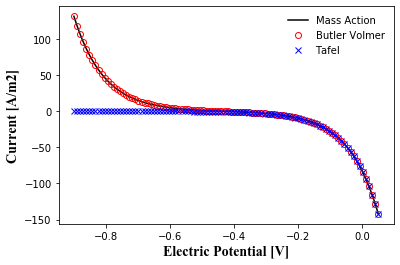

In [96]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

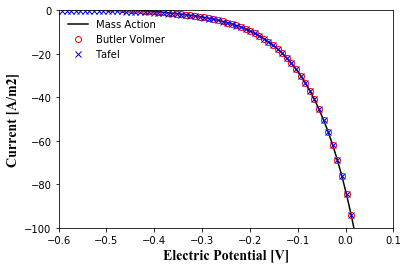

In [88]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.6,0.1))
plt.ylim((-100,0))
plt.show()

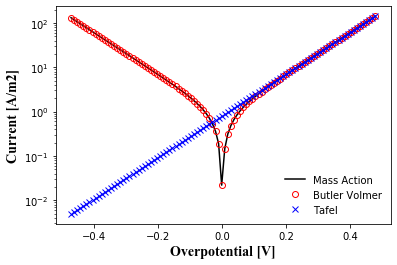

In [102]:
# Tafel Plot

fig2, ax2 = plt.subplots()
ax2.semilogy(eta,abs(i_elementary),linewidth = 1.5,color = 'k');
ax2.semilogy(eta,abs(i_BV),'o',markeredgecolor='r',markerfacecolor='none');
ax2.semilogy(eta,abs(i_Tafel),'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

#### Discussion:

The plots above show that Tafel current matches well with currents derived from other methods especially when overpotential values are large and positive. This behavior is based on the assumption that the anodic term of the BV equation dominates the cathodic term. Note that the Tafel current devaites from BV and Mass action currents significantly as the overpotential becomes smaller and approches to zero.